In [2]:
from parse import load_dataframes
import pandas as pd

data = load_dataframes()

In [14]:
stores = data['stores']
stores.rename(columns={'id':'store'}, inplace = True)
ratings_stores = pd.merge(data['reviews'], stores, on='store')
group = ratings_stores.groupby(["store", "store_name", "user"])
mean = group.mean().reset_index()
user_rating_store = mean.pivot_table('score', index='user', columns="store_name").fillna(0)

In [15]:
user_rating_store.head()

store_name,010수산,100회,101번지남산돈까스,10G,10막창,117파크,11자리,17도씨,17테이블,18번완당집,...,중원,중화가정,중화복춘,중화요리궁,쥬뗑뷔뜨,쥬마뺄,쥬씨,즉떡왕,즉석우동짜장,지구당
user,,,,,,,,,,,,,,,,,,,,,
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
user_rating_store.shape

(3965, 3821)

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
user_sim = cosine_similarity(user_rating_store, user_rating_store)
user_sim_df = pd.DataFrame(data = user_sim, index = user_rating_store.index, columns = user_rating_store.index)

In [18]:
user_sim.shape

(3965, 3965)

In [22]:
# 음식점 유사도
store_rating_by_user = user_rating_store.transpose()
store_sim = cosine_similarity(store_rating_by_user,store_rating_by_user)
store_sim_df = pd.DataFrame(data = store_sim, index = store_rating_by_user.index, columns=store_rating_by_user.index)

In [23]:
store_rating_by_user.shape
store_sim_df.head(10)

store_name,010수산,100회,101번지남산돈까스,10G,10막창,117파크,11자리,17도씨,17테이블,18번완당집,...,중원,중화가정,중화복춘,중화요리궁,쥬뗑뷔뜨,쥬마뺄,쥬씨,즉떡왕,즉석우동짜장,지구당
store_name,,,,,,,,,,,,,,,,,,,,,
010수산,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100회,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101번지남산돈까스,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10G,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10막창,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117파크,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11자리,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17도씨,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.105564,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17테이블,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
for i in store_sim_df.index:
    print(i)
    print(store_sim_df[i].sort_values(ascending=False)[1:10])
    print()

010수산
store_name
김광일간장새우    1.000000
신취원양꼬치     0.624695
란콰이진       0.577350
낭만달호       0.514496
중경삼림       0.514496
김명자굴국밥     0.468521
3일한우국밥     0.336861
고반식당       0.244949
무월         0.226779
Name: 010수산, dtype: float64

100회
store_name
지구당       0.0
마마수제만두    0.0
마앤나       0.0
마실면가      0.0
마실        0.0
마시차이나     0.0
마시께       0.0
마스터스시     0.0
마스타       0.0
Name: 100회, dtype: float64

101번지남산돈까스
store_name
마라돈왕주먹고기    0.685994
미스터슬라이스     0.685994
응야끼도리       0.548795
드립          0.535672
강동홍어        0.514496
제주몬트락       0.514496
노란코끼리       0.514496
복희아구찜동태탕    0.514496
스시산         0.514496
Name: 101번지남산돈까스, dtype: float64

10G
store_name
앤티앤스        0.980581
주유별장        0.612564
고봉삼계탕       0.519524
원당감자탕       0.358057
더플레이스       0.335243
오쭈          0.292714
롯데리아        0.252252
아오리의행방불명    0.197104
강촌닭갈비       0.196116
Name: 10G, dtype: float64

10막창
store_name
나주소나주곰탕    1.0
무시칸        1.0
난차이        1.0
낮달         1.0
단물곤물       1.0
이현우스시      1.0
정진식당       1.0
양갈비에꼬치다

Name: 감성고기, dtype: float64

감성다방
store_name
빠레트       0.577350
동래별장      0.360668
일상다반      0.144620
매운향솥      0.127515
마루가메제면    0.000000
마마추       0.000000
마실면가      0.000000
마실        0.000000
마시차이나     0.000000
Name: 감성다방, dtype: float64

감성바베큐
store_name
멘무샤       0.662266
김사또       0.567889
고71집      0.529813
고메구락부     0.529813
무사        0.529813
오복닭한마리    0.529813
막걸리싸롱     0.529813
남춘천닭갈비    0.529813
제이스케익     0.529813
Name: 감성바베큐, dtype: float64

감성타코
store_name
까미노빵집    0.251285
스시하루     0.245784
루엔타이     0.240810
자성당      0.227038
뎁짜이      0.215164
리아의오븐    0.213223
가츠벤또     0.203069
부뚜막      0.203069
고수닭갈비    0.203069
Name: 감성타코, dtype: float64

감싸롱
store_name
앙스트블뤼테      0.242387
시타라         0.238243
아지겐         0.204598
올마이티치즈버거    0.119460
더피자보이즈      0.116675
일상다반        0.114598
다운타우너       0.036342
마스타         0.000000
마샹스         0.000000
Name: 감싸롱, dtype: float64

감악산생소금구이
store_name
마라돈왕주먹고기    0.0
마앤나         0.0
마실면가        0.0
마실          0.0
마시차이나       0.0
마시께

고놈들
store_name
고놈들      1.000000
조선식당     0.762493
슬로우스텝    0.624695
돈돈       0.310460
마시께      0.000000
마스터스시    0.000000
마시차이나    0.000000
마마된장     0.000000
마샹스      0.000000
Name: 고놈들, dtype: float64

고다이
store_name
마마된장     0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
마산아구찜    0.0
Name: 고다이, dtype: float64

고동운식당
store_name
덕이네손수제비    1.000000
보은식당       1.000000
나뽕남        1.000000
다무치아       1.000000
고꼬로오뎅      1.000000
부엌우동집      1.000000
비스토핑       1.000000
고동운식당      1.000000
국수나무       0.707107
Name: 고동운식당, dtype: float64

고등어정식할매집
store_name
감성고기      1.000000
연경        1.000000
쟈니로켓      1.000000
동성장       1.000000
동해해물탕     0.811107
중앙모밀      0.780869
정산팥집      0.707107
부산기장짬뽕    0.707107
아지        0.615457
Name: 고등어정식할매집, dtype: float64

고디바
store_name
디저트연구소    0.392232
오후의과일     0.237915
마마수제만두    0.000000
마실면가      0.000000
마실        0.000000
마시차이나     0.000000
마시께       0.000000
마스터스시     0.000000
마스타       0.000000
Na

Name: 구공탄곱창, dtype: float64

구기동면옥
store_name
지구당       0.0
마마수제만두    0.0
마앤나       0.0
마실면가      0.0
마실        0.0
마시차이나     0.0
마시께       0.0
마스터스시     0.0
마스타       0.0
Name: 구기동면옥, dtype: float64

구기촌
store_name
지구당       0.0
마마수제만두    0.0
마앤나       0.0
마실면가      0.0
마실        0.0
마시차이나     0.0
마시께       0.0
마스터스시     0.0
마스타       0.0
Name: 구기촌, dtype: float64

구덕포끝집고기
store_name
도셰프      0.322329
지구당      0.000000
마실면가     0.000000
마실       0.000000
마시차이나    0.000000
마시께      0.000000
마스터스시    0.000000
마스타      0.000000
마샹스      0.000000
Name: 구덕포끝집고기, dtype: float64

구레스시
store_name
지구당       0.0
마마수제만두    0.0
마앤나       0.0
마실면가      0.0
마실        0.0
마시차이나     0.0
마시께       0.0
마스터스시     0.0
마스타       0.0
Name: 구레스시, dtype: float64

구룡포막회
store_name
소도둑      0.707107
고기투어     0.615457
리얼스페인    0.524142
노랑통닭     0.402911
마시께      0.000000
마산아구찜    0.000000
마샹스      0.000000
마스타      0.000000
마스터스시    0.000000
Name: 구룡포막회, dtype: float64

구름공방
store_name
백구당       1.0
왕가마솥      1

store_name
버들골이야기     0.700140
에피세리꼴라주    0.700140
긴자바이린      0.700140
들깨이야기      0.700140
그랜드뮤즈      0.700140
블랑제르       0.700140
무한소        0.611132
수타생왕돈까스    0.560112
대성이네       0.546718
Name: 김가네, dtype: float64

김가네분식
store_name
스테이히얼투데이    0.857493
대포집         0.857493
동경야시장       0.857493
일미아구찜       0.857493
대가집보쌈       0.514496
모꼬지         0.514496
국시락         0.514496
공간리필        0.514496
수목식당        0.428746
Name: 김가네분식, dtype: float64

김가면옥
store_name
김가면옥     1.0
지구당      0.0
마마된장     0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
Name: 김가면옥, dtype: float64

김광일간장새우
store_name
김광일간장새우    1.000000
신취원양꼬치     0.624695
란콰이진       0.577350
낭만달호       0.514496
중경삼림       0.514496
김명자굴국밥     0.468521
3일한우국밥     0.336861
고반식당       0.244949
무월         0.226779
Name: 김광일간장새우, dtype: float64

김다락방
store_name
지구당       0.0
마마수제만두    0.0
마앤나       0.0
마실면가      0.0
마실        0.0
마시차이나     0.0
마시께       0.0
마스터스시     0.0
마스타       0.0
Name: 김다락방, dt

store_name
개돼지펍      1.000000
르챔버       1.000000
낙랑파라      1.000000
먹방김치찌개    1.000000
선셋로얄      0.707107
무진장       0.707107
아빠곰탕      0.685994
안도        0.577350
보사노바      0.565685
Name: 낙랑파라, dtype: float64

낙산이모냉면
store_name
백구당       1.0
왕가마솥      1.0
양양양꼬치     1.0
동숭숯불갈비    1.0
마로화적      1.0
상수동치맥     1.0
생생통영마을    1.0
구름공방      1.0
대광어회집     1.0
Name: 낙산이모냉면, dtype: float64

낙원스낵
store_name
까마귀포차    0.707107
베르베르     0.408248
마망갸또     0.400000
인더매스     0.353381
육전식당     0.296500
19티      0.294174
스시도쿠     0.096231
마실       0.000000
마시차이나    0.000000
Name: 낙원스낵, dtype: float64

낙원양꼬치
store_name
마왕족발     0.0
마앤나      0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
Name: 낙원양꼬치, dtype: float64

낙원타코
store_name
불광동황소곱창구이    0.310087
육진정육식당       0.310087
연이네닭도리탕      0.310087
오프더그라운드      0.310087
꼬꼬아찌         0.310087
온도           0.310087
루프탑키친        0.310087
루나씨엘로        0.295584
꽃을피우고        0.289769
Name: 낙원타코, dtype: float64

난랑
st

Name: 닌자초밥, dtype: float64

다계촌
store_name
지구당      0.0
마야       0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
Name: 다계촌, dtype: float64

다과상사
store_name
드도트            0.615457
나우니스           0.615457
바오바            0.615457
엉클샘팬케이크        0.615457
우주최강도시락        0.615457
만뽀             0.615457
브루스            0.492366
보느파티쓰리         0.492366
레이지모먼트커피스탠드    0.492366
Name: 다과상사, dtype: float64

다기야
store_name
지구당      0.0
마야       0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
Name: 다기야, dtype: float64

다깡
store_name
레귤러하우스    0.780869
끌레22      0.624695
더벤티       0.624695
샤브향       0.499756
반디나무      0.390244
다솥맛집      0.315519
맛나감자탕     0.300274
공차        0.247169
생어거스틴     0.157826
Name: 다깡, dtype: float64

다다익선
store_name
원차우         1.000000
그린바스켓       1.000000
다다익선        1.000000
갈비씨         0.707107
곤트란쉐리에      0.662266
목동버거        0.577350
어니스트팬케이크    0.529813
델리레스토       0.441726

Name: 대한닭발1979, dtype: float64

대한맥주집
store_name
메이차이나         0.464991
대박포차          0.464991
르미엘커피         0.464991
도스타코스         0.464991
맛밥            0.464991
리킨치킨          0.464991
우리바다수산        0.464991
대왕족발          0.464991
뽀글뚝배기냠냠비빔밥    0.464991
Name: 대한맥주집, dtype: float64

대호네서먹으면돼지
store_name
일월성          1.000000
오투치킨         1.000000
또와순두부수제비     1.000000
대호네서먹으면돼지    1.000000
두꺼비식당        1.000000
싱싱오징어바다      0.688247
성식이네매운닭발     0.514496
용마해장국        0.373002
디델리          0.346410
Name: 대호네서먹으면돼지, dtype: float64

대호포차
store_name
영빈관          1.000000
대박순대국        1.000000
돌깨마을맷돌순두부    1.000000
모두다갈비        1.000000
소야지          1.000000
용두쭈꾸미        1.000000
노원명가네        1.000000
장모님냉면        0.780869
남원추어탕        0.707107
Name: 대호포차, dtype: float64

댈러스바베큐
store_name
암사떡볶이         0.662266
아시안테이블        0.567889
이너모스트         0.365675
스시혼           0.248108
북막골           0.128499
브루클린더버거조인트    0.126519
스타벅스          0.106800
마루이치라멘        0.000000
마마수제만두        0.000

Name: 돈박, dtype: float64

돈부리연
store_name
일상밥상     0.624695
지구당      0.000000
마마된장     0.000000
마실면가     0.000000
마실       0.000000
마시차이나    0.000000
마시께      0.000000
마스터스시    0.000000
마스타      0.000000
Name: 돈부리연, dtype: float64

돈사돈
store_name
종로스테이크     0.453344
닭익는마을      0.424671
안동참찜닭      0.390529
안동본가국밥     0.386912
바오바오       0.386912
궁          0.346064
더닭         0.309529
고고즉석떡볶이    0.309529
육풍         0.300288
Name: 돈사돈, dtype: float64

돈삼육지
store_name
지구당      0.0
마마된장     0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
Name: 돈삼육지, dtype: float64

돈수백
store_name
오만닭갈비            0.382360
물고기초밥            0.382360
모퉁이네             0.364642
고메구락부            0.305888
제이스케익            0.305888
주류식당             0.305888
그냥삼겹살집이나할걸그랬다    0.305888
남춘천닭갈비           0.305888
장충당              0.305888
Name: 돈수백, dtype: float64

돈슐랭
store_name
봉구스밥버거     0.707107
경희궁닭곰탕     0.707107
인더매스       0.552158
북해도목장      0.500000
암사초밥       0.4

Name: 또봉이통닭, dtype: float64

또와순두부수제비
store_name
일월성          1.000000
오투치킨         1.000000
또와순두부수제비     1.000000
대호네서먹으면돼지    1.000000
두꺼비식당        1.000000
싱싱오징어바다      0.688247
성식이네매운닭발     0.514496
용마해장국        0.373002
디델리          0.346410
Name: 또와순두부수제비, dtype: float64

똥고집
store_name
돼지꿈          0.615457
멘카야          0.615457
조인바이트        0.615457
우리곱창         0.615457
미음죽          0.615457
문타로          0.615457
P268         0.603506
모헤닉스테이308    0.603506
바비박스         0.597081
Name: 똥고집, dtype: float64

똥집의정석
store_name
라도맨션     0.669589
말뚝곱창     0.562972
신세계등뼈    0.485071
고우       0.370381
구공탄곱창    0.342177
동차밥      0.297999
독립카츠     0.251336
중앙해장     0.083394
마샹스      0.000000
Name: 똥집의정석, dtype: float64

똥찌비
store_name
소문난집     1.000000
똥찌비      1.000000
암사소곱창    0.857493
암사초밥     0.780869
잇츠       0.780869
아빠감자탕    0.707107
꾸러기분식    0.707107
맥덕스      0.666667
대박집      0.650945
Name: 똥찌비, dtype: float64

뚜레쥬르
store_name
억고집          0.461880
수제명륜왕만두      0.461880
방이샤브샤브칼국수

Name: 루흐, dtype: float64

룰루랄라
store_name
지구당      0.0
마마된장     0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
Name: 룰루랄라, dtype: float64

류
store_name
송도집         1.0
부엔디아        1.0
원조시장손칼국수    1.0
부평족발        1.0
머구리         1.0
88중국대반점     1.0
소나이         1.0
골목끝집        1.0
족발앤순대       1.0
Name: 류, dtype: float64

류서방짬뽕
store_name
샤오시안      0.539360
밥에큐       0.261116
고옥        0.202808
지구당       0.000000
마마수제만두    0.000000
마실        0.000000
마시차이나     0.000000
마시께       0.000000
마스터스시     0.000000
Name: 류서방짬뽕, dtype: float64

르구르메
store_name
지구당      0.0
마마된장     0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
Name: 르구르메, dtype: float64

르꼬숑
store_name
지구당      0.0
마마된장     0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
Name: 르꼬숑, dtype: float64

르미엘
store_name
명동교자      0.529999
쉐이크쉑      0.145521
마마수제만두    0.000000
마앤나       0.000000
마실면

Name: 마포닭곰탕, dtype: float64

마포만두
store_name
마장동박현규     0.857493
엄마손김밥      0.857493
이슬감자탕      0.857493
제일곱창       0.857493
이삭토스트      0.685994
미다래        0.685994
우주라이크커피    0.669589
명장족        0.669589
옵션         0.669589
Name: 마포만두, dtype: float64

마포밥상
store_name
소공동뚝배기집    1.000000
마포밥상       1.000000
돈탄         0.800000
남원추어탕      0.707107
원조남원추어탕    0.529813
귀빈순대국      0.521286
램플러스       0.457496
멜로워        0.435194
가츠몽        0.424264
Name: 마포밥상, dtype: float64

마포본가
store_name
마마된장     0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
마산아구찜    0.0
Name: 마포본가, dtype: float64

마포소금구이
store_name
지구당      0.0
마마된장     0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
Name: 마포소금구이, dtype: float64

마포숯불갈비
store_name
지구당      0.0
마마된장     0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
Name: 마포숯불갈비, dtype: float64

마포원조떡볶이
store_name
오늘은골뱅이     0.

Name: 멜로워, dtype: float64

면동떡볶이
store_name
시래정각        0.707107
부산밀면냉면      0.707107
대한닭발1979    0.707107
대치동할머니냉면    0.707107
아사원         0.707107
빵선생         0.707107
잭아저씨보쌈      0.707107
신토불이        0.707107
등촌샤브칼국수     0.707107
Name: 면동떡볶이, dtype: float64

면장
store_name
노고단칼국수    0.639602
졍동국시      0.529813
지구당       0.000000
마마된장      0.000000
마실        0.000000
마시차이나     0.000000
마시께       0.000000
마스터스시     0.000000
마스타       0.000000
Name: 면장, dtype: float64

면장만두
store_name
끼아로젤라떼리아    1.0
마마된장        0.0
마실면가        0.0
마실          0.0
마시차이나       0.0
마시께         0.0
마스터스시       0.0
마스타         0.0
마샹스         0.0
Name: 면장만두, dtype: float64

면채반
store_name
용산양꼬치     0.707107
아이노테이블    0.662266
스시선       0.624695
사직커피      0.505076
성북동면옥집    0.458349
매란방       0.430331
마린칸토      0.404061
부추곱창      0.400892
성북동빵공장    0.353553
Name: 면채반, dtype: float64

면채움
store_name
마마된장     0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
마산아구찜  


문화공감수정
store_name
보느파티쓰리         0.615457
모노스코프          0.615457
레이지모먼트커피스탠드    0.615457
브루스            0.615457
우리닭갈비          0.615457
누각             0.615457
상하이다이닝         0.435194
원스누들           0.435194
베르크로스터스        0.369274
Name: 문화공감수정, dtype: float64

문화촌
store_name
감성타코      0.049252
지구당       0.000000
마마수제만두    0.000000
마앤나       0.000000
마실면가      0.000000
마실        0.000000
마시차이나     0.000000
마시께       0.000000
마스터스시     0.000000
Name: 문화촌, dtype: float64

물고기
store_name
지구당      0.0
마마된장     0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
Name: 물고기, dtype: float64

물고기초밥
store_name
물고기초밥    1.00000
돈수백      0.38236
마마된장     0.00000
마실면가     0.00000
마실       0.00000
마시차이나    0.00000
마시께      0.00000
마스터스시    0.00000
마스타      0.00000
Name: 물고기초밥, dtype: float64

뮤즈서울
store_name
경계선       0.707107
경성주방      0.573539
다래함박스텍    0.235294
지구당       0.000000
마실        0.000000
마시차이나     0.000000
마시께       0.000000
마스터스시     0.000

Name: 바오바오, dtype: float64

바오밥
store_name
알렉스플레이스     0.685994
달달데이        0.685994
마실          0.685994
빈체로         0.685994
곰미커피        0.685994
메스테이블       0.514496
장미술상        0.514496
산토리니커피      0.514496
아메리칸트레일러    0.514496
Name: 바오밥, dtype: float64

바오버거
store_name
명향         0.707107
사카나식당      0.707107
금문         0.707107
엄마국수딸전복    0.565685
어부횟집       0.500000
온채당        0.400000
오복미역       0.366618
마스타        0.000000
마샹스        0.000000
Name: 바오버거, dtype: float64

바오쯔
store_name
와일드멀블루차     0.577350
제주상회        0.577350
이문어세상       0.577350
남도맛집        0.577350
앵거스박고기공장    0.577350
돼지연구소       0.577350
그린앤그레인      0.577350
868식당       0.471405
마루가메제면      0.462910
Name: 바오쯔, dtype: float64

바우네나주곰탕
store_name
엄마손김밥     0.771517
제일곱창      0.771517
마장동박현규    0.771517
이슬감자탕     0.771517
마포만두      0.661570
이삭토스트     0.617213
미다래       0.617213
명장족       0.602453
옵션        0.602453
Name: 바우네나주곰탕, dtype: float64

바이레인
store_name
김환쪽갈비       0.857493
중대양곱창       0.567889
광부맥주   

Name: 베이커스, dtype: float64

베이크하우스
store_name
신기산업       0.616316
멕코이치킨      0.577350
문창식갈비탕     0.577350
미식가의연어     0.577350
로스노비오스     0.577350
우리가왕갈비탕    0.577350
아부리야       0.577350
낭만코다리      0.577350
수제맥주집      0.577350
Name: 베이크하우스, dtype: float64

베제투스
store_name
부리또리     1.000000
북티크      1.000000
베제투스     1.000000
뽀스뜨레     0.970143
순대실록     0.676123
오무사      0.624695
소담촌      0.615457
장천       0.577350
아늑한주방    0.529813
Name: 베제투스, dtype: float64

베지나랑
store_name
미스줄리     1.0
지구당      0.0
마마된장     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
Name: 베지나랑, dtype: float64

베질루르
store_name
알렉스키친      1.000000
베질루르       1.000000
비블레스       0.696311
더스트릿       0.539164
남원황토추어탕    0.529813
가배도        0.485071
어반소스       0.371391
육회공작소      0.366508
계탄집        0.341793
Name: 베질루르, dtype: float64

베트남노상식당
store_name
산토리니커피      0.377964
아메리칸트레일러    0.377964
메스테이블       0.377964
영동식당        0.377964
장미술상        0.377964
오가다         0.377964
감동칩스    

Name: 북티크, dtype: float64

북한산장어명가
store_name
김삼보      0.645497
신전떡볶이    0.472456
마마돈      0.000000
마실       0.000000
마시차이나    0.000000
마시께      0.000000
마스터스시    0.000000
마스타      0.000000
마샹스      0.000000
Name: 북한산장어명가, dtype: float64

북해도목장
store_name
경희궁닭곰탕     0.707107
자양동수산      0.565685
내일의커피      0.500000
돈슐랭        0.500000
전통춘천닭갈비    0.408248
송추가마골      0.408248
금용문        0.358569
알렉스더커피     0.316228
시카노이에      0.316228
Name: 북해도목장, dtype: float64

북해빙수
store_name
옹헤야         0.552158
요우코소        0.552158
본토치킨        0.552158
동대문곱창       0.552158
곱창홀릭        0.552158
어사또         0.552158
연지막창소미곱창    0.552158
마루칼국수       0.441726
언니네다락방      0.441726
Name: 북해빙수, dtype: float64

분99
store_name
경        0.780869
북촌칼국수    0.624695
내풀로      0.609756
장군집      0.441726
아임파이     0.441726
나따오비까    0.390244
보이어      0.390244
블랑       0.261943
고메트리     0.232810
Name: 분99, dtype: float64

분스타
store_name
지구당         0.0
마라돈왕주먹고기    0.0
마앤나         0.0
마실면가        0.0
마실          0.0
마시차

Name: 빨강떡볶이, dtype: float64

빨봉분식
store_name
연막술       0.800000
삼겹싸롱      0.800000
고기랑한방울    0.640000
대가집보쌈     0.600000
국시락       0.600000
모꼬지       0.600000
갓파스시      0.499756
더시카고짬뽕    0.499756
온채당       0.424264
Name: 빨봉분식, dtype: float64

빵길따라
store_name
몽상클레르     0.800000
능동샐러드     0.600000
자매나주곰탕    0.600000
공공거실      0.480000
삼맛호오떡     0.480000
신용산감자탕    0.461880
부엌쟁이      0.424264
시골쌈밥      0.424264
순수치킨      0.411597
Name: 빵길따라, dtype: float64

빵나무
store_name
지구당       0.0
마마수제만두    0.0
마실면가      0.0
마실        0.0
마시차이나     0.0
마시께       0.0
마스터스시     0.0
마스타       0.0
마샹스       0.0
Name: 빵나무, dtype: float64

빵다무르
store_name
빵다무르     1.000000
오복미역     0.518476
마마된장     0.000000
마실       0.000000
마시차이나    0.000000
마시께      0.000000
마스터스시    0.000000
마스타      0.000000
마샹스      0.000000
Name: 빵다무르, dtype: float64

빵선생
store_name
묵동할머니떡볶이    1.000000
아사원         1.000000
부산밀면냉면      1.000000
대치동할머니냉면    1.000000
알로이타이       0.707107
라피자노스트라     0.707107
면동떡볶이       0.707107
잔치잔치돼

Name: 상봉커피, dtype: float64

상상짬뽕
store_name
지구당      0.0
마마된장     0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
Name: 상상짬뽕, dtype: float64

상수동치맥
store_name
백구당       1.0
왕가마솥      1.0
양양양꼬치     1.0
동숭숯불갈비    1.0
마로화적      1.0
상수동치맥     1.0
생생통영마을    1.0
구름공방      1.0
대광어회집     1.0
Name: 상수동치맥, dtype: float64

상인정신
store_name
솔밭삼겹살    0.624695
지구당      0.000000
마마된장     0.000000
마실면가     0.000000
마실       0.000000
마시차이나    0.000000
마시께      0.000000
마스터스시    0.000000
마스타      0.000000
Name: 상인정신, dtype: float64

상일동287
store_name
지구당      0.0
마마된장     0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
Name: 상일동287, dtype: float64

상하이다이닝
store_name
정석참치           0.707107
장터이모통닭         0.707107
브루스            0.707107
이십칠            0.707107
송도집            0.707107
부엔디아           0.707107
레이지모먼트커피스탠드    0.707107
모노스코프          0.707107
원조시장손칼국수       0.707107
Name: 상하이다이닝, dtype: float64

새마을식

Name: 세미계, dtype: float64

세븐브로이펍
store_name
옐로우팟        0.948683
1979서기치킨    0.948683
애니앤길버트버거    0.948683
제주생고기       0.948683
매화반점        0.948683
그레피스        0.948683
오복집         0.948683
머그포래빗       0.948683
새마을포차       0.948683
Name: 세븐브로이펍, dtype: float64

세븐스프링스
store_name
양가곱창      1.000000
세븐스프링스    1.000000
오브아       1.000000
광주집       0.948683
남도식당      0.801784
광화문양갈비    0.800000
스톤힐       0.577350
졍동국시      0.529813
교동집       0.447214
Name: 세븐스프링스, dtype: float64

세와엔
store_name
민혁이네외국포차    0.424264
지구당         0.000000
마실면가        0.000000
마실          0.000000
마시차이나       0.000000
마시께         0.000000
마스터스시       0.000000
마스타         0.000000
마샹스         0.000000
Name: 세와엔, dtype: float64

세이로
store_name
고택        0.80829
경성다락방     0.80000
개미기사식당    0.80000
국보집       0.80000
오빠의앞치마    0.80000
러스트       0.80000
대찬육회      0.80000
보갱        0.80000
손씨집       0.80000
Name: 세이로, dtype: float64

세인트블랙
store_name
오브니          0.524142
야순네식당        0.524142
시옌           0.524142

store_name
순천만남도한식    1.0
지구당        0.0
마마수제만두     0.0
마실면가       0.0
마실         0.0
마시차이나      0.0
마시께        0.0
마스터스시      0.0
마스타        0.0
Name: 수참치, dtype: float64

수철이네왕새우튀김
store_name
도마족발      1.000000
덕수칼국수     1.000000
바로한국수     1.000000
스시진       0.615457
민들레식당     0.577350
오징어나라     0.577350
안녕식당      0.271538
마마된장      0.000000
마마수제만두    0.000000
Name: 수철이네왕새우튀김, dtype: float64

수초밥
store_name
명태어장      0.499756
마포갈비      0.406642
서민준밀밭     0.312348
지구당       0.000000
마마수제만두    0.000000
마실        0.000000
마시차이나     0.000000
마시께       0.000000
마스터스시     0.000000
Name: 수초밥, dtype: float64

수타생왕돈까스
store_name
김가네      0.560112
맘스터치     0.222566
지구당      0.000000
마실면가     0.000000
마실       0.000000
마시차이나    0.000000
마시께      0.000000
마스터스시    0.000000
마스타      0.000000
Name: 수타생왕돈까스, dtype: float64

수퍼판
store_name
마구로다찌         0.624695
원할머니국수보쌈      0.624695
만땅스시          0.624695
주지육림          0.624695
먹자대게          0.624695
올반            0.624695
산사로           0.624695
1

Name: 스탠딩스테이크, dtype: float64

스탠스커피
store_name
야채가게       0.707107
수염         0.707107
베르크로스터스    0.565685
샤인투데이      0.500000
모파상        0.363803
개미집        0.338062
이든돈카츠      0.312348
사보텐        0.232845
이치젠        0.221404
Name: 스탠스커피, dtype: float64

스터번
store_name
장군찜닭     0.355953
두화당      0.352043
두껍삼      0.311601
더앨리      0.233460
마스터스시    0.000000
마시께      0.000000
마스타      0.000000
마시차이나    0.000000
마마된장     0.000000
Name: 스터번, dtype: float64

스테이모어
store_name
어썸로즈      0.800000
루프트발롱     0.685994
BHC치킨     0.500000
김태완스시     0.370625
올드페리도넛    0.365148
에머이       0.224662
마망갸또      0.000000
마마수제만두    0.000000
마마추       0.000000
Name: 스테이모어, dtype: float64

스테이크잡스
store_name
나노갈매기     1.000000
스테이크잡스    1.000000
데이투데이     1.000000
맛나감자탕     0.480673
샤오시안      0.404520
야마벤또      0.402015
살롱드보네     0.369274
곁집        0.284747
설빙        0.276501
Name: 스테이크잡스, dtype: float64

스테이히얼투데이
store_name
동경야시장     1.000000
대포집       1.000000
일미아구찜     1.000000
김가네분식     0.857493
공간리필   

Name: 썸카페, dtype: float64

쎄투
store_name
아이와         0.707107
열봉이         0.707107
난이네곱창       0.606339
베트남생쌀국수     0.565685
신도세기        0.500000
오챠드1974     0.408248
레드문         0.371391
제주은희네해장국    0.316228
대련집         0.312348
Name: 쎄투, dtype: float64

쏘마이피자
store_name
마포만두      0.610591
제일곱창      0.481125
이슬감자탕     0.481125
엄마손김밥     0.481125
마장동박현규    0.481125
라도스트      0.384900
미다래       0.384900
와인코르크     0.384900
정사장       0.384900
Name: 쏘마이피자, dtype: float64

쏭타이
store_name
웰빙두부마을    1.000000
영동다방      1.000000
옛날농장      1.000000
쏭타이       1.000000
샤브오       0.700140
목동버거      0.577350
시후쿠       0.360844
대가방       0.335578
도셰프       0.322329
Name: 쏭타이, dtype: float64

쓰리도어즈
store_name
자매찜나라    1.000000
이식당      0.780869
에버그린     0.707107
더티핑크     0.707107
스노잉      0.662266
스톤힐      0.577350
제주포차     0.562544
녹원쌈밥     0.505076
더스트릿     0.431331
Name: 쓰리도어즈, dtype: float64

쓰리에따주
store_name
쓰리에따주      1.000000
샤이바나       0.800000
베어스덴       0.780869
마카오도우라오    0.707107
삼육가      

Name: 앤티앤스, dtype: float64

앤하우스
store_name
마라       0.0
마앤나      0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
Name: 앤하우스, dtype: float64

앵거스박고기공장
store_name
와일드멀블루차       1.000000
돼지연구소         1.000000
제주상회          1.000000
남도맛집          1.000000
868식당         0.816497
마루가메제면        0.801784
동경규동          0.800000
원할매이모네닭한마리    0.707107
바오쯔           0.577350
Name: 앵거스박고기공장, dtype: float64

앵두꽃
store_name
앵두꽃        1.000000
일상밥상       0.780869
고베그릴       0.571429
솔밭삼겹살      0.468521
귀빈순대국      0.417029
신의주찹쌀순대    0.333333
스시도쿠       0.226819
가장맛있는족발    0.213201
쉐이크쉑       0.194029
Name: 앵두꽃, dtype: float64

야간얼큰우동
store_name
아오키교자      0.514496
쇼고         0.514496
장남식당       0.342997
당산김밥떡볶이    0.241052
육회먹은연어     0.224544
새우당        0.220639
돈수백        0.209837
당산옛날곱창     0.179124
방콕야시장      0.175897
Name: 야간얼큰우동, dtype: float64

야곱
store_name
낭만주점     1.000000
야곱       1.000000
도시포차     1.000000
미나미      1.000000
아주불곱창    0.80000

Name: 에티오피아, dtype: float64

에피세리꼴라주
store_name
버들골이야기     1.000000
에피세리꼴라주    1.000000
긴자바이린      1.000000
들깨이야기      1.000000
블랑제르       1.000000
무한소        0.872872
대성이네       0.780869
백화네부엌      0.707107
정민         0.707107
Name: 에피세리꼴라주, dtype: float64

에픽하우스
store_name
울산댁만남      0.780869
더가리비       0.780869
우마이찬       0.780869
멘무샤        0.624695
사월그날       0.552158
김사또        0.535672
다운트        0.508302
감성바베큐      0.413714
나가하마만게츠    0.365575
Name: 에픽하우스, dtype: float64

엔모듬전
store_name
잔비워        1.000000
기장꼼장어      1.000000
백남옥손만두     1.000000
옛날종로빈대떡    1.000000
엔모듬전       1.000000
얌타이        1.000000
막          0.800000
디히랑        0.780869
깻잎치킨       0.624695
Name: 엔모듬전, dtype: float64

엔스시
store_name
마포갈비생등심    0.500000
시오         0.342129
고우         0.305424
새우당        0.303239
마산아구찜      0.000000
마마수제만두     0.000000
마마추        0.000000
마망갸또       0.000000
마봉자김밥      0.000000
Name: 엔스시, dtype: float64

엔와이84.8
store_name
뉴욕야시장         0.475651
고릴라김밥         0.240869
에그랑누

Name: 오뎅식당, dtype: float64

오디너리레시피
store_name
오디너리레시피    1.000000
연운당        0.488678
야마벤또       0.402015
지구당        0.000000
마마수제만두     0.000000
마마추        0.000000
마망갸또       0.000000
마봉자김밥      0.000000
마산아구찜      0.000000
Name: 오디너리레시피, dtype: float64

오떡
store_name
수다감자탕    0.780869
동주루      0.707107
지구당      0.000000
마마돈      0.000000
마시차이나    0.000000
마시께      0.000000
마스터스시    0.000000
마스타      0.000000
마샹스      0.000000
Name: 오떡, dtype: float64

오뗄드니엔테
store_name
리틀빅토리      0.685994
메그엔스튜디오    0.514496
겐츠베이커리     0.514496
고향의맛       0.514496
오븐에빠진닭     0.485071
미스터스시      0.342997
이고집쭈꾸미     0.332756
미도리야       0.321403
세미계        0.314425
Name: 오뗄드니엔테, dtype: float64

오또상스시
store_name
지구당      0.0
마마돈      0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
마산아구찜    0.0
Name: 오또상스시, dtype: float64

오랄레
store_name
오감국시         0.800000
애니홀          0.707107
쟌슨빌부대찌개      0.707107
감천양조장        0.624695
장사랑          0.529813
어무이          0.436436
고운

Name: 와인코르크, dtype: float64

와일드멀블루차
store_name
와일드멀블루차       1.000000
돼지연구소         1.000000
제주상회          1.000000
남도맛집          1.000000
868식당         0.816497
마루가메제면        0.801784
동경규동          0.800000
원할매이모네닭한마리    0.707107
바오쯔           0.577350
Name: 와일드멀블루차, dtype: float64

와플그란데
store_name
지구당      0.0
마마된장     0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
Name: 와플그란데, dtype: float64

와플대학
store_name
서교동언니네    0.780869
미스테이크룸    0.624695
낙곱새미장원    0.552158
앤드히어      0.499756
기러기둥지     0.373327
바이킹스워프    0.271864
브리너       0.227266
이치젠       0.195600
두툼        0.195122
Name: 와플대학, dtype: float64

와플앨리
store_name
언니네다락방     1.0
올어바웃미      1.0
어게인리프레쉬    1.0
로사벨라       1.0
대충유원지      1.0
와플앨리       1.0
제뉴어리피크닉    1.0
위긴티식스      1.0
미쉬매쉬       1.0
Name: 와플앨리, dtype: float64

와플잇업
store_name
마호가니      0.344864
연희김밥      0.298326
빵의정석      0.295141
도쿄샌드위치    0.295141
더파이브올스    0.295141
빠삭튀김      0.295141
쁘띠렌       0.295141
볶음쌈밥    

Name: 원조집, dtype: float64

원조할매곱창
store_name
인생물약      0.762493
블루커피      0.539164
간판없는가게    0.465116
명국수       0.431331
야상해       0.343758
소도둑       0.323498
렁팡스       0.289856
복만루       0.285578
분카샤       0.211477
Name: 원조할매곱창, dtype: float64

원조할매국밥
store_name
부산기장짬뽕    0.707107
지구당       0.000000
마마된장      0.000000
마실면가      0.000000
마실        0.000000
마시차이나     0.000000
마시께       0.000000
마스터스시     0.000000
마스타       0.000000
Name: 원조할매국밥, dtype: float64

원조할매족발보쌈
store_name
원조할매족발보쌈      1.000000
정릉갈비          1.000000
마시차이나         0.707107
7번가피자         0.624695
손짱카레          0.524142
뚱뚱이밥상         0.514496
명쭈3           0.500000
전주콩나루콩나물국밥    0.424264
버거톤           0.222375
Name: 원조할매족발보쌈, dtype: float64

원차우
store_name
원차우         1.000000
그린바스켓       1.000000
다다익선        1.000000
갈비씨         0.707107
곤트란쉐리에      0.662266
목동버거        0.577350
어니스트팬케이크    0.529813
델리레스토       0.441726
랑데자뷰        0.359211
Name: 원차우, dtype: float64

원할매이모네닭한마리
store_name
백철판0410     0.707107
국고

Name: 이빠네마그릴, dtype: float64

이삭토스트
store_name
엄마손김밥      0.800000
마장동박현규     0.800000
이슬감자탕      0.800000
제일곱창       0.800000
마포만두       0.685994
미다래        0.640000
명장족        0.624695
옵션         0.624695
우주라이크커피    0.624695
Name: 이삭토스트, dtype: float64

이삭홍두깨손칼국수
store_name
지구당      0.0
마마된장     0.0
마실면가     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
Name: 이삭홍두깨손칼국수, dtype: float64

이상진돈까스
store_name
밥한끼       0.517632
언양생고기     0.486664
바오27      0.486664
송식연어      0.486664
바이커스버거    0.486664
더홈서울      0.486664
명국수       0.458831
곰돌이돈까스    0.458831
서강쇠떡볶이    0.417311
Name: 이상진돈까스, dtype: float64

이상한나라의떡볶이
store_name
이상한나라의떡볶이    1.000000
더식당          0.424264
노랑통닭         0.322329
안녕식당         0.271538
마시차이나        0.000000
마시께          0.000000
마스터스시        0.000000
마실           0.000000
마스타          0.000000
Name: 이상한나라의떡볶이, dtype: float64

이상한나라의미쓰윤
store_name
삼호정육식당    0.588348
르사이공      0.490051
몬스터피자     0.231887
중앙해장      0.127152
지구당  

Name: 잠수교집, dtype: float64

잠원떡볶이
store_name
부토       0.544331
오무사      0.425051
민티       0.272166
떡볶이공방    0.272166
보배짬뽕     0.272166
오토       0.140028
오술차      0.134005
바게트케이    0.134005
19티      0.113228
Name: 잠원떡볶이, dtype: float64

장군돼지국밥
store_name
골목분식     0.363803
이비가짬뽕    0.290021
지구당      0.000000
마마된장     0.000000
마실       0.000000
마시차이나    0.000000
마시께      0.000000
마스터스시    0.000000
마스타      0.000000
Name: 장군돼지국밥, dtype: float64

장군집
store_name
롤리밥스       0.707107
남흥골삼호가든    0.707107
잼잼칩스       0.707107
경          0.565685
내풀로        0.441726
분99        0.441726
더브래드팬트리    0.441726
당가원        0.424264
소풍가는날      0.408248
Name: 장군집, dtype: float64

장군찜닭
store_name
대구근대골목단팥빵    0.455842
료하코          0.455842
스터번          0.355953
별아돈카츠        0.322329
비아메렝게        0.251697
브롱스          0.192081
구복           0.189075
미즈컨테이너       0.126428
문숙이미나리식당     0.113961
Name: 장군찜닭, dtype: float64

장남식당
store_name
밀성횟집      0.500000
야간얼큰우동    0.342997
서울초밥      0.209657
렁팡스       0.19007

store_name
제주삼다돈    1.0
지구당      0.0
마마된장     0.0
마실       0.0
마시차이나    0.0
마시께      0.0
마스터스시    0.0
마스타      0.0
마샹스      0.0
Name: 제주삼다돈, dtype: float64

제주상회
store_name
와일드멀블루차       1.000000
돼지연구소         1.000000
제주상회          1.000000
남도맛집          1.000000
868식당         0.816497
마루가메제면        0.801784
동경규동          0.800000
원할매이모네닭한마리    0.707107
바오쯔           0.577350
Name: 제주상회, dtype: float64

제주생고기
store_name
1979서기치킨    1.0
애니앤길버트버거    1.0
제주생고기       1.0
매화반점        1.0
그레피스        1.0
오복집         1.0
머그포래빗       1.0
새마을포차       1.0
돈앤칡         1.0
Name: 제주생고기, dtype: float64

제주식당
store_name
젠틀서퍼      0.442080
속초항뱃머리    0.442080
언더프레셔     0.348434
연수커피      0.320256
잔비워       0.320256
엔모듬전      0.320256
백남옥손만두    0.320256
얌타이       0.320256
기장꼼장어     0.320256
Name: 제주식당, dtype: float64

제주애육당
store_name
옐로우팟      0.857493
돈앤칡       0.857493
새마을포차     0.857493
그레피스      0.857493
서울트럭      0.857493
매화반점      0.857493
비마이게스트    0.857493
달콤스타      0.857493
교토        0.857493

In [36]:
more_review_group = ratings_stores.groupby(["store"])
count = more_review_group.count()
count = count.loc[count['id']>=3, :]

,id,user,score,content,reg_time,sanga_number,상호명,gu,dong,large_category_id,...,small_category_id,small_category_name,pyojun_category,지번주소,경도,위도,store_name,address,latitude,longitude
store,,,,,,,,,,,,,,,,,,,,,
150,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
550,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
555,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
842,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
972,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358992,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
359300,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
359402,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [41]:
count = count.drop(count.loc[0:], axis = 1).reset_index()
count

,store
0,150
1,550
2,555
3,842
4,972
...,...
1076,358992
1077,359300
1078,359402
1079,359537


In [44]:
more_reviews = pd.merge(count, ratings_stores, on="store")
group = more_reviews.groupby(["store", "store_name", "user"])
mean = group.mean().reset_index()
user_rating_store_more = mean.pivot_table('score', index='user', columns="store_name").fillna(0)

In [45]:
user_rating_store_more

store_name,101번지남산돈까스,17도씨,17테이블,19티,1인1잔,29펍,39돈가스,3일한우국밥,4SEED,502세컨즈카페,...,주은감자탕,준수방키친,준지의아름다운하루,중국관,중대양곱창,중심,중앙해장,중화가정,중화복춘,지구당
user,,,,,,,,,,,,,,,,,,,,,
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
947927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
949019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
user_sim = cosine_similarity(user_rating_store_more, user_rating_store_more)
user_sim_df = pd.DataFrame(data = user_sim, index = user_rating_store_more.index, columns = user_rating_store_more.index)
user_sim_df

user,23,166,182,189,313,345,535,541,744,746,...,946050,946187,946652,946771,947653,947671,947927,949019,949944,950331
user,,,,,,,,,,,,,,,,,,,,,
23,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.0,1.000000,0.0,0.399043,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182,0.0,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189,0.0,0.399043,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
313,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947671,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
947927,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
949019,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
for i in user_sim_df.index:
    print(i)
    print(user_sim_df[i].sort_values(ascending=False)[1:10])
    print()

23
user
1599      1.000000
4629      0.505076
392082    0.294884
504746    0.239426
516840    0.224231
103304    0.140488
172079    0.000000
172049    0.000000
171967    0.000000
Name: 23, dtype: float64

166
user
28722     0.399043
260171    0.399043
153126    0.399043
157564    0.399043
261822    0.399043
666409    0.399043
219458    0.399043
51752     0.399043
426952    0.399043
Name: 166, dtype: float64

182
user
55705     0.624695
222975    0.624695
8338      0.624695
22062     0.624695
261654    0.624695
49771     0.624695
37980     0.624695
194122    0.624695
22636     0.624695
Name: 182, dtype: float64

189
user
199172    1.0
295792    1.0
260171    1.0
195216    1.0
193795    1.0
329184    1.0
365315    1.0
261822    1.0
219458    1.0
Name: 189, dtype: float64

313
user
85786     1.000000
313       1.000000
323845    0.441726
155466    0.348155
950331    0.000000
172504    0.000000
172490    0.000000
172079    0.000000
172049    0.000000
Name: 313, dtype: float64

345
user
672

Name: 24895, dtype: float64

24943
user
128662    1.000000
24943     1.000000
158429    1.000000
880552    1.000000
426302    1.000000
95664     1.000000
286800    0.662266
79647     0.416025
192676    0.360668
Name: 24943, dtype: float64

24953
user
250560    0.780869
674768    0.450835
133993    0.269425
114074    0.239560
90296     0.227199
53368     0.069952
171678    0.000000
172504    0.000000
172490    0.000000
Name: 24953, dtype: float64

24964
user
175320    0.762493
551587    0.762493
479278    0.762493
50137     0.595407
51466     0.539164
110348    0.476326
138436    0.457496
60263     0.457496
4548      0.457496
Name: 24964, dtype: float64

25002
user
327668    1.000000
137126    1.000000
473329    0.800000
452187    0.707107
390564    0.468521
276312    0.299813
884890    0.267261
170852    0.000000
171918    0.000000
Name: 25002, dtype: float64

25134
user
446105    0.57735
342978    0.57735
899670    0.57735
135354    0.57735
151203    0.57735
106216    0.57735
203033  

Name: 47528, dtype: float64

47751
user
163884    0.324443
194387    0.254457
217350    0.217571
950331    0.000000
171918    0.000000
172770    0.000000
172504    0.000000
172490    0.000000
172079    0.000000
Name: 47751, dtype: float64

48104
user
48104     1.000000
522869    0.707107
859147    0.650945
409870    0.346410
154501    0.327693
950331    0.000000
171582    0.000000
172490    0.000000
172079    0.000000
Name: 48104, dtype: float64

48295
user
261456    0.486664
49642     0.363636
950331    0.000000
171918    0.000000
172946    0.000000
172770    0.000000
172504    0.000000
172490    0.000000
172079    0.000000
Name: 48295, dtype: float64

48369
user
177951    0.505076
130558    0.447214
133470    0.424264
388218    0.397360
91034     0.371391
176665    0.314485
170852    0.000000
172049    0.000000
172955    0.000000
Name: 48369, dtype: float64

48442
user
65621     1.000000
118351    1.000000
180539    1.000000
48442     1.000000
357985    1.000000
294618    0.707107
79

Name: 71595, dtype: float64

71632
user
820044    0.323423
97283     0.323423
30184     0.323423
158717    0.323423
23533     0.323423
835141    0.323423
325654    0.323423
31984     0.323423
906243    0.323423
Name: 71632, dtype: float64

71758
user
935084    0.357771
155466    0.348155
593182    0.206284
728009    0.175750
170196    0.000000
171582    0.000000
172504    0.000000
172490    0.000000
172079    0.000000
Name: 71758, dtype: float64

71789
user
112180    0.615457
202112    0.615457
175875    0.615457
143267    0.615457
491073    0.615457
133152    0.615457
877370    0.615457
108457    0.615457
632235    0.615457
Name: 71789, dtype: float64

71798
user
71798     1.000000
551366    1.000000
85130     0.662266
365596    0.512148
157653    0.483368
219293    0.478913
48793     0.450835
391631    0.383131
51405     0.355335
Name: 71798, dtype: float64

71929
user
314531    0.400000
224347    0.374634
169940    0.276172
884890    0.200446
170419    0.000000
172504    0.000000
17

Name: 95985, dtype: float64

96278
user
354228    0.832050
31058     0.624695
171582    0.000000
172770    0.000000
172504    0.000000
172490    0.000000
172079    0.000000
172049    0.000000
171967    0.000000
Name: 96278, dtype: float64

96320
user
158378    0.552158
439187    0.441726
61770     0.441726
188061    0.441726
28032     0.441726
851090    0.441726
113143    0.441726
216704    0.441726
693784    0.441726
Name: 96320, dtype: float64

96360
user
37980     0.390434
8338      0.390434
194122    0.390434
49771     0.390434
246545    0.390434
22062     0.390434
22636     0.390434
780237    0.390434
153678    0.390434
Name: 96360, dtype: float64

96373
user
893228    1.000000
96373     1.000000
864883    1.000000
759526    1.000000
918040    0.520756
219293    0.478913
395948    0.464238
173428    0.441726
73273     0.372678
Name: 96373, dtype: float64

96471
user
710742    1.000000
796502    1.000000
629675    0.529813
48977     0.441726
171918    0.000000
172946    0.000000
17

Name: 127770, dtype: float64

127843
user
532716    0.668153
257101    0.668153
192836    0.668153
44077     0.668153
502484    0.668153
626385    0.668153
314345    0.668153
596425    0.668153
786717    0.668153
Name: 127843, dtype: float64

127971
user
65841     0.800000
47484     0.800000
66639     0.800000
340512    0.800000
447445    0.800000
417735    0.800000
643010    0.800000
870790    0.776114
828166    0.685994
Name: 127971, dtype: float64

128254
user
403425    1.000000
820908    0.201262
950331    0.000000
171329    0.000000
172490    0.000000
172079    0.000000
172049    0.000000
171967    0.000000
171918    0.000000
Name: 128254, dtype: float64

128271
user
317967    0.421076
122394    0.421076
109058    0.421076
172946    0.421076
101449    0.421076
574786    0.421076
149217    0.421076
397299    0.421076
156256    0.421076
Name: 128271, dtype: float64

128349
user
8272      0.468521
71242     0.369274
171582    0.000000
172770    0.000000
172504    0.000000
172490    0

user
500728    1.000000
626780    1.000000
85601     1.000000
434980    1.000000
386300    1.000000
112521    1.000000
48786     1.000000
52558     1.000000
328899    0.707107
Name: 148013, dtype: float64

148115
user
148115    1.000000
178745    1.000000
280081    0.707107
138572    0.514496
177951    0.505076
158711    0.425628
364509    0.397360
211972    0.374634
391631    0.287348
Name: 148115, dtype: float64

148169
user
63763     1.000000
148777    1.000000
113896    1.000000
76564     1.000000
940225    1.000000
44204     1.000000
148169    1.000000
89712     0.928477
87704     0.780869
Name: 148169, dtype: float64

148206
user
148206    1.000000
200652    1.000000
441889    1.000000
126931    1.000000
2419      0.624695
93647     0.600000
33061     0.529813
510431    0.390567
531388    0.371391
Name: 148206, dtype: float64

148254
user
922709    0.980581
785864    0.980581
149955    0.980581
132734    0.765705
326607    0.612564
158018    0.573841
322019    0.566139
837135    

Name: 167525, dtype: float64

168468
user
261659    1.000000
197936    0.600000
251765    0.441726
728009    0.131812
950331    0.000000
171918    0.000000
172770    0.000000
172504    0.000000
172490    0.000000
Name: 168468, dtype: float64

168720
user
170419    0.577350
209755    0.554700
358474    0.529813
283160    0.301511
90296     0.290957
391794    0.139431
950331    0.000000
171918    0.000000
172504    0.000000
Name: 168720, dtype: float64

168899
user
332593    1.000000
417312    1.000000
168899    1.000000
67245     0.780869
424678    0.707107
218450    0.707107
721055    0.707107
572720    0.290957
53368     0.223957
Name: 168899, dtype: float64

168906
user
520926    1.000000
326607    0.780869
744060    0.577350
259415    0.505076
172490    0.000000
172079    0.000000
172049    0.000000
171967    0.000000
171918    0.000000
Name: 168906, dtype: float64

168976
user
318671    1.000000
708493    1.000000
73577     0.357771
256325    0.331042
391153    0.252982
641859    0

Name: 190972, dtype: float64

190973
user
752559    0.80
172955    0.80
380098    0.64
321692    0.60
246545    0.60
55705     0.60
49771     0.60
222975    0.60
194122    0.60
Name: 190973, dtype: float64

191023
user
87338     1.000000
315174    1.000000
790247    1.000000
862633    0.980581
731285    0.857493
182213    0.617213
245897    0.562544
179719    0.436436
314604    0.433013
Name: 191023, dtype: float64

191100
user
75433     1.000000
191100    1.000000
116307    1.000000
887586    0.832050
469418    0.780869
441024    0.624695
251474    0.529813
884890    0.267261
328775    0.224662
Name: 191100, dtype: float64

191191
user
254431    1.000000
191191    1.000000
288157    0.399043
646881    0.363636
85688     0.286446
171582    0.000000
172504    0.000000
172490    0.000000
172079    0.000000
Name: 191191, dtype: float64

191321
user
191321    1.000000
256163    0.281272
950331    0.000000
171549    0.000000
172504    0.000000
172490    0.000000
172079    0.000000
172049   

user
212304    1.000000
357798    0.303046
950331    0.000000
171678    0.000000
172504    0.000000
172490    0.000000
172079    0.000000
172049    0.000000
171967    0.000000
Name: 212304, dtype: float64

212461
user
195667    1.000000
150433    1.000000
173943    1.000000
154154    1.000000
149684    1.000000
212461    1.000000
57125     1.000000
292280    1.000000
283386    0.780869
Name: 212461, dtype: float64

212969
user
544656    0.431331
326210    0.431331
347151    0.431331
286165    0.431331
18783     0.385710
279978    0.323498
74666     0.323498
45308     0.323498
113136    0.323498
Name: 212969, dtype: float64

213231
user
43325     1.000000
213231    1.000000
360829    0.707107
9852      0.529813
950331    0.000000
171678    0.000000
172770    0.000000
172504    0.000000
172490    0.000000
Name: 213231, dtype: float64

213301
user
367815    0.328266
221510    0.328266
357985    0.328266
180539    0.328266
65621     0.328266
48442     0.328266
118351    0.328266
446157    

Name: 248636, dtype: float64

248657
user
201575    0.857493
71242     0.492366
334694    0.423999
169940    0.368230
950331    0.000000
171678    0.000000
172770    0.000000
172504    0.000000
172490    0.000000
Name: 248657, dtype: float64

248809
user
248809    1.000000
93563     0.529813
209755    0.277350
884890    0.267261
170611    0.000000
171918    0.000000
172504    0.000000
172490    0.000000
172079    0.000000
Name: 248809, dtype: float64

249051
user
699447    0.301084
74904     0.301084
869698    0.266123
630504    0.266123
26843     0.266123
87328     0.266123
582482    0.266123
389704    0.266123
5995      0.266123
Name: 249051, dtype: float64

249391
user
630210    0.720294
919073    0.640000
322844    0.600000
157628    0.600000
917934    0.600000
91720     0.271420
67868     0.216401
5666      0.174013
171549    0.000000
Name: 249391, dtype: float64

249421
user
64412     0.615457
220831    0.400629
3882      0.295420
190725    0.248682
42484     0.207323
96360     0

Name: 280639, dtype: float64

280698
user
280698    1.0
501746    1.0
899377    1.0
709700    1.0
200875    1.0
757228    1.0
42721     1.0
131375    1.0
8323      1.0
Name: 280698, dtype: float64

280826
user
899381    0.707107
334694    0.299813
288157    0.282166
179727    0.151186
315462    0.141421
174016    0.000000
171582    0.000000
172490    0.000000
172079    0.000000
Name: 280826, dtype: float64

280855
user
811088    0.624695
745622    0.596285
128271    0.421076
356252    0.390360
89781     0.371391
172490    0.000000
172079    0.000000
172049    0.000000
171967    0.000000
Name: 280855, dtype: float64

280902
user
945633    1.000000
906467    1.000000
6791      1.000000
280902    1.000000
288137    1.000000
793871    1.000000
838134    1.000000
4891      1.000000
75794     0.742781
Name: 280902, dtype: float64

280976
user
280976    1.000000
724982    0.200250
728009    0.131812
172504    0.000000
172490    0.000000
172079    0.000000
172049    0.000000
171967    0.000000

318030
user
319754    0.374634
284839    0.374634
162500    0.374634
400694    0.374634
63030     0.374634
924719    0.374634
2368      0.374634
630195    0.374634
254239    0.374634
Name: 318030, dtype: float64

318073
user
92831     1.000000
420587    1.000000
475865    1.000000
613041    1.000000
203647    1.000000
398867    0.780869
3357      0.707107
13006     0.624695
518696    0.624695
Name: 318073, dtype: float64

318272
user
392887    0.650945
391017    0.585206
650202    0.386695
171136    0.000000
172079    0.000000
172049    0.000000
171967    0.000000
171918    0.000000
171678    0.000000
Name: 318272, dtype: float64

318479
user
88316     0.337526
132504    0.205076
179727    0.106904
950331    0.000000
171582    0.000000
172504    0.000000
172490    0.000000
172079    0.000000
172049    0.000000
Name: 318479, dtype: float64

318665
user
88703     0.707107
320562    0.707107
402103    0.500000
212036    0.500000
364509    0.374634
72749     0.348155
322627    0.338643
505

Name: 353976, dtype: float64

354228
user
96278     0.83205
63030     0.55470
319754    0.55470
162500    0.55470
328802    0.55470
891451    0.55470
73653     0.55470
254239    0.55470
400694    0.55470
Name: 354228, dtype: float64

354415
user
12225     0.624695
397331    0.624695
138402    0.624695
50592     0.624695
18611     0.624695
43926     0.552158
650429    0.552158
329189    0.517143
89719     0.450835
Name: 354415, dtype: float64

354580
user
437478    1.000000
327058    0.707107
178016    0.544331
211914    0.424264
184471    0.280745
469245    0.224961
308702    0.218218
186286    0.187135
391794    0.104573
Name: 354580, dtype: float64

354616
user
365881    1.0
109566    1.0
357454    1.0
169532    1.0
328852    1.0
256643    1.0
49598     1.0
42540     1.0
48740     1.0
Name: 354616, dtype: float64

354874
user
152151    0.857493
134807    0.857493
343008    0.857493
444370    0.606339
467642    0.477697
255093    0.264706
70650     0.221866
322627    0.197119
32143   

user
750343    1.000000
20363     0.209529
950331    0.000000
171582    0.000000
172770    0.000000
172504    0.000000
172490    0.000000
172079    0.000000
172049    0.000000
Name: 386856, dtype: float64

386968
user
49956     0.457496
237186    0.457496
284374    0.323498
781898    0.235881
49999     0.214183
68977     0.212387
31285     0.199099
882571    0.192187
94677     0.184856
Name: 386968, dtype: float64

386983
user
150196    0.223607
163884    0.162221
950331    0.000000
171678    0.000000
172770    0.000000
172504    0.000000
172490    0.000000
172079    0.000000
172049    0.000000
Name: 386983, dtype: float64

386997
user
420344    0.327327
361309    0.257172
317740    0.257172
198873    0.257172
276312    0.246731
218901    0.224916
28330     0.205738
209839    0.205738
353809    0.205738
Name: 386997, dtype: float64

387113
user
413895    1.000000
16096     1.000000
940619    0.707107
89781     0.464238
421743    0.447214
220825    0.447214
171967    0.307794
53368     

Name: 421743, dtype: float64

422310
user
921028    0.279885
391957    0.077382
170172    0.000000
171329    0.000000
172079    0.000000
172049    0.000000
171967    0.000000
171918    0.000000
171678    0.000000
Name: 422310, dtype: float64

422401
user
422401    1.000000
46758     1.000000
254215    1.000000
539803    1.000000
790931    1.000000
677778    1.000000
418830    0.707107
179653    0.600000
230662    0.529999
Name: 422401, dtype: float64

423011
user
198805    1.0
393935    1.0
252216    0.3
172490    0.0
172079    0.0
172049    0.0
171967    0.0
171918    0.0
171678    0.0
Name: 423011, dtype: float64

423018
user
506377    0.685994
836215    0.514496
95763     0.514496
96613     0.514496
27962     0.514496
107059    0.514496
109581    0.514496
562349    0.514496
783730    0.514496
Name: 423018, dtype: float64

423140
user
452036    1.000000
423140    1.000000
389767    1.000000
92150     1.000000
334520    0.707107
358118    0.707107
234398    0.624695
76488     0.560112

Name: 501275, dtype: float64

501746
user
280698    1.0
501746    1.0
899377    1.0
709700    1.0
200875    1.0
757228    1.0
42721     1.0
131375    1.0
8323      1.0
Name: 501746, dtype: float64

501799
user
501799    1.000000
281932    0.707107
314604    0.433013
823651    0.371391
155466    0.348155
308702    0.218218
950331    0.000000
171582    0.000000
172079    0.000000
Name: 501799, dtype: float64

502484
user
636320    1.0
923681    1.0
532716    1.0
753506    1.0
111561    1.0
386792    1.0
502484    1.0
199178    1.0
257101    1.0
Name: 502484, dtype: float64

502763
user
53199     0.600000
481150    0.600000
388812    0.565685
126946    0.565685
745622    0.357771
923459    0.198625
724982    0.160200
170611    0.000000
170852    0.000000
Name: 502763, dtype: float64

503594
user
503594    1.000000
348677    0.707107
69676     0.529813
218901    0.208232
386997    0.205738
728009    0.175750
173943    0.000000
171549    0.000000
172490    0.000000
Name: 503594, dtype: floa

Name: 597706, dtype: float64

598467
user
358700    0.707107
201157    0.707107
792019    0.707107
219760    0.707107
794785    0.707107
23255     0.707107
506648    0.552158
110306    0.500000
149784    0.500000
Name: 598467, dtype: float64

599838
user
46312     1.000000
87328     1.000000
169608    1.000000
582482    1.000000
599838    1.000000
219577    0.801784
347289    0.500000
43793     0.293294
856133    0.291730
Name: 599838, dtype: float64

599892
user
599892    1.000000
424722    1.000000
879835    1.000000
219299    1.000000
350912    0.780869
132734    0.624695
85808     0.424264
580520    0.227921
46936     0.200000
Name: 599892, dtype: float64

600241
user
158717    0.421076
835141    0.421076
194854    0.421076
820044    0.421076
317949    0.421076
739296    0.421076
95916     0.421076
358109    0.421076
906243    0.421076
Name: 600241, dtype: float64

603870
user
554633    0.970143
728009    0.175750
950331    0.000000
171549    0.000000
172504    0.000000
172490    0

Name: 686300, dtype: float64

686313
user
938515    1.0
686313    1.0
950331    0.0
171582    0.0
172504    0.0
172490    0.0
172079    0.0
172049    0.0
171967    0.0
Name: 686313, dtype: float64

686939
user
686939    1.0
112304    1.0
171582    0.0
172770    0.0
172504    0.0
172490    0.0
172079    0.0
172049    0.0
171967    0.0
Name: 686939, dtype: float64

687969
user
282575    0.492366
91092     0.369274
285710    0.369274
715137    0.369274
922962    0.369274
560395    0.369274
459047    0.369274
212056    0.369274
359203    0.369274
Name: 687969, dtype: float64

688218
user
136661    0.707107
30184     0.707107
835141    0.707107
353809    0.707107
782157    0.707107
317949    0.707107
358109    0.707107
23533     0.707107
393032    0.707107
Name: 688218, dtype: float64

688620
user
790296    1.0
334992    1.0
63399     1.0
192450    1.0
652607    1.0
294354    1.0
82581     1.0
703432    1.0
664747    1.0
Name: 688620, dtype: float64

688736
user
159599    0.447214
54197    

Name: 766243, dtype: float64

768586
user
134877    1.000000
318030    0.280976
950331    0.000000
171582    0.000000
172504    0.000000
172490    0.000000
172079    0.000000
172049    0.000000
171967    0.000000
Name: 768586, dtype: float64

768680
user
45410     1.0
303258    1.0
171678    0.0
172770    0.0
172504    0.0
172490    0.0
172079    0.0
172049    0.0
171967    0.0
Name: 768680, dtype: float64

770493
user
798855    1.000000
470215    1.000000
389608    1.000000
770493    1.000000
282875    0.928477
114081    0.800000
247634    0.707107
887586    0.554700
68203     0.514496
Name: 770493, dtype: float64

773716
user
99088     0.857493
676064    0.514496
321062    0.514496
924153    0.514496
385886    0.514496
5311      0.365636
328925    0.321403
85615     0.264706
128498    0.264706
Name: 773716, dtype: float64

774737
user
108457    1.000000
774737    1.000000
197081    0.745356
65081     0.662266
4347      0.662266
71789     0.615457
355767    0.615457
807425    0.520756

user
367815    0.707107
240289    0.707107
546902    0.707107
446157    0.707107
72531     0.707107
459734    0.707107
31058     0.552158
665848    0.539164
95336     0.481125
Name: 858004, dtype: float64

859147
user
48104     0.650945
129012    0.650945
522869    0.460287
358474    0.431099
836480    0.390567
363944    0.390567
68563     0.390567
392159    0.390567
42317     0.390567
Name: 859147, dtype: float64

859898
user
208228    0.514496
88316     0.337526
128271    0.336861
237668    0.289642
145101    0.244339
129333    0.242536
728009    0.175750
950331    0.000000
171582    0.000000
Name: 859898, dtype: float64

860255
user
2112      0.707107
256609    0.500000
930847    0.500000
241227    0.400000
292085    0.390434
135672    0.316228
149300    0.307729
514754    0.293610
530433    0.274398
Name: 860255, dtype: float64

861280
user
132144    0.423587
431662    0.382360
358687    0.305888
641062    0.305888
9895      0.305888
247060    0.305888
227401    0.305888
316446    

Name: 939724, dtype: float64

940225
user
63763     1.000000
148777    1.000000
113896    1.000000
76564     1.000000
940225    1.000000
44204     1.000000
148169    1.000000
89712     0.928477
87704     0.780869
Name: 940225, dtype: float64

940619
user
386792    0.707107
923681    0.707107
44077     0.707107
596425    0.707107
502484    0.707107
636320    0.707107
192836    0.707107
413895    0.707107
257101    0.707107
Name: 940619, dtype: float64

944033
user
593945    1.0
363134    1.0
473854    1.0
182301    1.0
569529    1.0
692426    1.0
733207    1.0
708518    1.0
88172     1.0
Name: 944033, dtype: float64

944343
user
177506    1.000000
372209    0.374634
950331    0.000000
172770    0.000000
172504    0.000000
172490    0.000000
172079    0.000000
172049    0.000000
171967    0.000000
Name: 944343, dtype: float64

944394
user
201564    1.000000
83257     1.000000
622340    1.000000
944394    1.000000
853410    1.000000
828625    0.894427
49805     0.780869
310557    0.707107

In [49]:
# 음식점 유사도
store_rating_by_user = user_rating_store_more.transpose()
store_sim = cosine_similarity(store_rating_by_user,store_rating_by_user)
store_sim_df = pd.DataFrame(data = store_sim, index = store_rating_by_user.index, columns=store_rating_by_user.index)
store_sim_df

store_name,101번지남산돈까스,17도씨,17테이블,19티,1인1잔,29펍,39돈가스,3일한우국밥,4SEED,502세컨즈카페,...,주은감자탕,준수방키친,준지의아름다운하루,중국관,중대양곱창,중심,중앙해장,중화가정,중화복춘,지구당
store_name,,,,,,,,,,,,,,,,,,,,,
101번지남산돈까스,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.104242,0.0,0.000000,0.0
17도씨,0.000000,1.000000,0.0,0.0,0.0,0.127071,0.0,0.000000,0.0,0.0,...,0.0,0.122828,0.0,0.000000,0.0,0.0,0.000000,0.0,0.105564,0.0
17테이블,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
19티,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.140143,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
1인1잔,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
중심,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.0
중앙해장,0.104242,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.257881,0.0,0.0,1.000000,0.0,0.000000,0.0
중화가정,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.0,0.000000,0.0


In [50]:
for i in store_sim_df.index:
    print(i)
    print(store_sim_df[i].sort_values(ascending=False)[1:10])
    print()

101번지남산돈까스
store_name
오쭈        0.500639
가배도       0.436742
삼성각       0.428537
리도엘리펀트    0.396942
아쭈        0.360302
별천지       0.321403
우쥬커피      0.316650
나노하나      0.316650
웰빙멸치국수    0.284083
Name: 101번지남산돈까스, dtype: float64

17도씨
store_name
블랑       0.395604
예티       0.296500
접대       0.253354
소신이쏘     0.245655
신촌수제비    0.240493
쌀통닭      0.222158
사이공마켓    0.219780
돈그리아     0.218980
반피차이     0.218360
Name: 17도씨, dtype: float64

17테이블
store_name
야마벤또     0.523379
버킷리스트    0.304749
밥에큐      0.226630
오후의과일    0.206493
손칼국수     0.178683
샤오시안     0.105328
우마이도     0.091601
이태리부부    0.079724
마렘마      0.000000
Name: 17테이블, dtype: float64

19티
store_name
808슈퍼스토어    0.320256
낙원스낵        0.294174
스시우찌        0.278747
계식당         0.273115
우마텐         0.245026
베르베르        0.240192
마망갸또        0.235339
새우당         0.223013
구름파스타       0.220416
Name: 19티, dtype: float64

1인1잔
store_name
시트론오피스     0.435194
여우골        0.400629
김진목삼       0.378788
루나씨엘로      0.357727
라스키친       0.322587
블랑         0

Name: 깜언, dtype: float64

깡통만두
store_name
랑꼬뉴      0.255377
다로베      0.183112
을지삼계탕    0.133488
요란한부엌    0.131352
유가츠      0.131149
송스키친     0.130258
바게트케이    0.128332
스시이마     0.127370
오향만두     0.127193
Name: 깡통만두, dtype: float64

깻잎치킨
store_name
문배동육칼       0.598100
더차이홍        0.585366
육대장         0.562455
제주은희네해장국    0.538514
본죽          0.499756
미쓰양꼬치       0.496457
고운님         0.488901
명우돈가        0.487970
더스트릿        0.471538
Name: 깻잎치킨, dtype: float64

꼬메이베베
store_name
듀윗       0.192659
동천       0.128499
중앙해장     0.085876
루나씨엘로    0.076987
마야       0.000000
마망갸또     0.000000
마마된장     0.000000
마린칸토     0.000000
림가기      0.000000
Name: 꼬메이베베, dtype: float64

꽃마름
store_name
버거킹        0.415199
당산김밥떡볶이    0.372496
생어거스틴      0.344265
은성감자탕      0.263395
죠스떡볶이      0.239716
구공탄곱창      0.237944
송화산시도삭면    0.218609
당산옛날곱창     0.207600
신촌수제비      0.205196
Name: 꽃마름, dtype: float64

꽃을피우고
store_name
돈그리아      0.317408
라그릴리아     0.309312
맥덕스       0.303895
너의작은식탁    0.295790
낙원타코      0.

라스키친
store_name
시트론오피스     0.370625
여우골        0.341188
김진목삼       0.322587
1인1잔       0.322587
루나씨엘로      0.304652
블랑         0.274725
남산케미스트리    0.262071
제주옥        0.242091
생어거스틴      0.242091
Name: 라스키친, dtype: float64

라시에스타
store_name
아방뮤제       0.282931
말카         0.255031
담장옆에국화꽃    0.246514
만석미역       0.208232
반반국수       0.208232
스시세이       0.208232
브라운핸즈      0.204188
노티스        0.204025
돈돈정        0.204025
Name: 라시에스타, dtype: float64

라온
store_name
루소랩          0.259323
리도엘리펀트       0.227508
돈천동식당        0.226861
브로일링커피컴퍼니    0.226861
맥심플랜트        0.226861
서강식당         0.212814
에일당          0.191953
별천지          0.184213
나노하나         0.181489
Name: 라온, dtype: float64

라이너스바베큐
store_name
산카이      0.177918
송추가마골    0.164434
마이스카이    0.144381
경복궁      0.134260
스모키살룬    0.124603
스시쇼우키    0.124300
라그릴리아    0.108707
올라       0.097688
배때기      0.094309
Name: 라이너스바베큐, dtype: float64

라이스&포테이토
store_name
중대양곱창    0.596040
보트르메종    0.262071
싸움의고수    0.257248
장독대      0.210538
은하곱창    

store_name
일치        0.365335
고고기       0.355578
안다즈커피     0.327760
리도엘리펀트    0.327122
어반소스      0.275571
별천지       0.264870
나노하나      0.260953
우쥬커피      0.260953
볶음쌈밥      0.239850
Name: 바르미, dtype: float64

바베양장
store_name
도로시인호텔     0.530288
돈그리아       0.307579
교양식사       0.275944
안도         0.255031
더티핑크       0.249878
이너모스트      0.243902
부추곱창       0.238009
갓포아키       0.234032
남산케미스트리    0.220863
Name: 바베양장, dtype: float64

바보형제쭈꾸미
store_name
다이도코로     0.268729
노르웨이식당    0.258603
농부핏자      0.222834
지구당       0.000000
마마된장      0.000000
마린칸토      0.000000
마르셀       0.000000
마루스시      0.000000
마루가메제면    0.000000
Name: 바보형제쭈꾸미, dtype: float64

바빌리안테이블
store_name
본죽        0.126844
중국관       0.112115
깻잎치킨      0.099048
사월식당      0.097584
속초항뱃머리    0.087547
의령전원      0.084004
고래회관      0.084004
겐로쿠우동     0.072597
고운님       0.070908
Name: 바빌리안테이블, dtype: float64

바스버거
store_name
미드레벨       0.316386
일치         0.313324
리도엘리펀트     0.280552
부산아지매국밥    0.264463
볶음쌈밥       0.257130
별천지      

Name: 생각보다맛있는집, dtype: float64

생고기제작소
store_name
마초쉐프     0.266667
지구당      0.000000
마이스카이    0.000000
마야       0.000000
마망갸또     0.000000
마마된장     0.000000
마린칸토     0.000000
마르셀      0.000000
마루스시     0.000000
Name: 생고기제작소, dtype: float64

생어거스틴
store_name
버거킹        0.402015
당산김밥떡볶이    0.360668
꽃마름        0.344265
제주옥        0.333333
에덴식당       0.266667
반쥴         0.260290
은성감자탕      0.255031
라스키친       0.242091
죠스떡볶이      0.232104
Name: 생어거스틴, dtype: float64

생활맥주
store_name
뜸들이다      0.324176
무명        0.232006
신용산감자탕    0.214423
부탄츄       0.182749
보승회관      0.180743
전설의짬뽕     0.173872
벽제갈비      0.164053
삼방매       0.143615
김영섭초밥     0.124666
Name: 생활맥주, dtype: float64

샤브쌈주머니
store_name
미친닭       0.533333
디저트연구소    0.509525
스시쿠니      0.502331
두껍삼       0.502331
김태완스시     0.367451
배떼기곱창     0.344265
빤닭빤닭      0.288534
종로황소곱창    0.252982
에머이       0.197797
Name: 샤브쌈주머니, dtype: float64

샤브오
store_name
목동버거      0.404226
시후쿠       0.252641
대가방       0.234952
도셰프       0.225676
배꼽집    

Name: 아날로그가든, dtype: float64

아늑한주방
store_name
순대실록      0.358219
장천        0.305888
동백양과점     0.274695
이든돈카츠     0.234032
얼스어스      0.234032
아날로그가든    0.212993
사월에쭈꾸미    0.206927
동숭동커피     0.206818
반쥴        0.191086
Name: 아늑한주방, dtype: float64

아델라베일리
store_name
더테이블      0.235065
바오쯔       0.217250
그린마일커피    0.199432
똥고집       0.185272
독립카츠      0.176467
본토닭갈비     0.166216
디초콜릿커피    0.153619
지구당       0.140971
공덕닭발왕     0.140234
Name: 아델라베일리, dtype: float64

아라카르트
store_name
101번지남산돈까스    0.200945
유림            0.076761
쉐이크쉑          0.075781
뚝떡            0.071307
매란방           0.000000
리틀파파포         0.000000
마망갸또          0.000000
마마된장          0.000000
마린칸토          0.000000
Name: 아라카르트, dtype: float64

아르모니움
store_name
얼크니손칼국수    0.322587
신기산업       0.281569
오공복이       0.124766
마녀주방       0.000000
리틀파파포      0.000000
림가기        0.000000
림돈까스       0.000000
마녀족발       0.000000
지구당        0.000000
Name: 아르모니움, dtype: float64

아방뮤제
store_name
돈돈정      0.443760
스노잉      0.415619
랑꼬뉴

Name: 우스블랑, dtype: float64

우에스토
store_name
을지삼계탕       0.384395
을지빈         0.318788
육미학         0.318788
오미식당        0.295689
밀크홀1937     0.284268
역전우동0410    0.284268
악바리         0.214423
분카샤         0.213504
성북동빵공장      0.204124
Name: 우에스토, dtype: float64

우와
store_name
마망갸또      0.310087
모퉁이네      0.290423
요란한부엌     0.276247
돈그리아      0.244282
BHC치킨     0.239237
맛집곱창구이    0.229852
교양식사      0.219158
라브리       0.215917
안도        0.202548
Name: 우와, dtype: float64

우쥬커피
store_name
리도엘리펀트        0.474836
별천지           0.384473
나노하나          0.378788
웰빙멸치국수        0.339830
길버트버거앤프라이즈    0.326077
앙스트블뤼테        0.326077
고고기           0.322587
올라            0.316650
101번지남산돈까스    0.316650
Name: 우쥬커피, dtype: float64

울프소셜클럽
store_name
역전우동0410     0.199053
당산김밥떡볶이      0.161633
기다스시         0.155607
우에스토         0.149383
을지빈          0.114292
비야게레로        0.108534
브로일링커피컴퍼니    0.095546
야상해          0.093319
이든돈카츠        0.085719
Name: 울프소셜클럽, dtype: float64

원가회관
store_name
용우동       0.417

In [5]:
import pandas as pd

df_population = pd.read_csv('../data/유동인구.csv')
df_population.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수', '연령대_10_유동인구_수', '연령대_20_유동인구_수',
       '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수',
       '시간대_1_유동인구_수', '시간대_2_유동인구_수', '시간대_3_유동인구_수', '시간대_4_유동인구_수',
       '시간대_5_유동인구_수', '시간대_6_유동인구_수', '월요일_유동인구_수', '화요일_유동인구_수',
       '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수'],
      dtype='object')

In [6]:
pop = df_population.loc[(df_population["기준_년_코드"]==2019) & (df_population["기준_분기_코드"]==2),:]
pop.rename(columns={
    '기준_년_코드':'year',
    '기준_분기_코드':'quarter',
    '상권_코드_명':'road',
    '총_유동인구_수':'total_pcnt',
    '남성_유동인구_수':'men_pcnt',
    '여성_유동인구_수':'women_pcnt',
    '연령대_10_유동인구_수':'teen_pcnt',
    '연령대_20_유동인구_수':'twenty_pcnt',
    '연령대_30_유동인구_수':'thirty_pcnt',
    '연령대_40_유동인구_수':'fourty_pcnt',
    '연령대_50_유동인구_수':'fifty_pcnt',
    '연령대_60_이상_유동인구_수':'sixty_pcnt',
    '시간대_1_유동인구_수':'time1_pcnt',
    '시간대_2_유동인구_수':'time2_pcnt',
    '시간대_3_유동인구_수':'time3_pcnt',
    '시간대_4_유동인구_수':'time4_pcnt',
    '시간대_5_유동인구_수':'time5_pcnt',
    '시간대_6_유동인구_수':'time6_pcnt',
    '월요일_유동인구_수':'mon_pcnt',
    '화요일_유동인구_수':'tue_pcnt',
    '수요일_유동인구_수':'wed_pcnt',
    '목요일_유동인구_수':'thr_pcnt',
    '금요일_유동인구_수':'fri_pcnt',
    '토요일_유동인구_수':'sat_pcnt',
    '일요일_유동인구_수':'sun_pcnt'
},inplace=True)
pop = pop.drop(columns=['상권_구분_코드', '상권_구분_코드_명', '상권_코드'])
pop

c:\users\multicampus\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,year,quarter,road,total_pcnt,men_pcnt,women_pcnt,teen_pcnt,twenty_pcnt,thirty_pcnt,fourty_pcnt,...,time4_pcnt,time5_pcnt,time6_pcnt,mon_pcnt,tue_pcnt,wed_pcnt,thr_pcnt,fri_pcnt,sat_pcnt,sun_pcnt
4098,2019,2,도봉산4길,88664,49229,39435,738,4558,5665,10289,...,27370,23141,3090,8646,8872,9478,8950,9177,20500,23047
4099,2019,2,평창길,30233,8447,21787,7745,5142,2771,4529,...,7261,5601,1017,4567,4803,4557,4223,4479,3055,4547
5052,2019,2,계동길,638841,326643,312201,38611,132953,154617,121723,...,161490,145673,33535,84298,96375,96234,96575,97009,96726,71632
5053,2019,2,난계로27길,2628926,1482662,1146258,109839,517716,494705,428151,...,589932,536695,219601,346819,352768,354830,353536,389687,415344,415939
5054,2019,2,돈화문로11가길,2117484,1170579,946907,57109,570312,427306,350152,...,470710,564511,209798,282393,302048,315543,311701,332266,339825,233709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,2019,2,천호대로197길,1742709,852106,890599,125483,284331,305523,302468,...,262000,359613,204839,237111,235318,262195,234396,245620,257221,270838
6056,2019,2,천호대로219길,197220,129539,67683,15545,22520,33134,38738,...,38939,33857,11229,31478,32725,32039,31803,34239,21349,13582
6057,2019,2,천호옛14길,3983885,1862103,2121778,171901,1030946,782320,611405,...,695672,1030556,521100,526891,537237,549441,544206,599189,635226,591692
6058,2019,2,천호옛길,3786483,1819086,1967396,180656,849983,745243,615077,...,612323,906228,475147,519481,525680,535013,526529,562287,566325,551183


In [66]:
data['stores'].columns

Index(['sanga_number', '상호명', 'gu', 'dong', 'large_category',
       'medium_category', 'small_category', 'pyojun_category', '지번주소', '경도',
       '위도', 'large_code', 'medium_code', 'small_code', 'road_name', 'id',
       'store_name', 'address', 'latitude', 'longitude'],
      dtype='object')

In [14]:
dong_stores = data['stores'].loc[data['stores']['dong'] == "신사동",['road_name']]
dong_stores = dong_stores.groupby(['road_name'])
ro = []
for item, i in dong_stores:
    ro.append(item.split()[2])
ro

['강남대로152길',
 '강남대로154길',
 '강남대로156길',
 '강남대로158길',
 '강남대로160길',
 '강남대로162길',
 '논현로',
 '논현로151길',
 '논현로153길',
 '논현로155길',
 '논현로157길',
 '논현로159길',
 '논현로161길',
 '논현로163길',
 '논현로171길',
 '논현로175길',
 '도산대로11길',
 '도산대로13길',
 '도산대로15길',
 '도산대로17길',
 '도산대로19길',
 '도산대로1길',
 '도산대로23길',
 '도산대로25길',
 '도산대로27길',
 '압구정로',
 '압구정로10길',
 '압구정로11길',
 '압구정로12길',
 '압구정로14길',
 '압구정로18길',
 '압구정로28길',
 '압구정로2길',
 '압구정로4길',
 '관천로',
 '관천로11길',
 '남부순환로',
 '남부순환로149길',
 '남부순환로151길',
 '남부순환로163가길',
 '조원로']

In [50]:
#신사동에 있는 도로명주소의 유동인구들 합을 뽑아보자!
road_popul = pop.loc[(pop["road"].isin(ro))].groupby(["year"])
road_popul = road_popul.sum().reset_index()
road_popul

,year,quarter,total_pcnt,men_pcnt,women_pcnt,teen_pcnt,twenty_pcnt,thirty_pcnt,fourty_pcnt,fifty_pcnt,...,time4_pcnt,time5_pcnt,time6_pcnt,mon_pcnt,tue_pcnt,wed_pcnt,thr_pcnt,fri_pcnt,sat_pcnt,sun_pcnt
0,2019,10,10227713,4741478,5486224,490893,3549342,2627125,1566155,1075120,...,2013798,2732359,1218547,1405208,1464865,1478716,1475341,1589906,1557025,1256646


In [83]:
# 성별
gender = road_popul.loc[:,['men_pcnt','women_pcnt']]
gender_values = []
gender
for i in gender:
    str = i
    str += " " + np.array2string(gender[i].values[0])
    str += "명"
    gender_values.append(str)
    
gender_values

['men_pcnt 4741478명', 'women_pcnt 5486224명']

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

def set_config():
    # 폰트, 그래프 색상 설정
    font_list = fm.findSystemFonts(fontpaths=None, fontext="ttf")
    if any(["notosanscjk" in font.lower() for font in font_list]):
        plt.rcParams["font.family"] = "Noto Sans CJK JP"
    else:
        if not any(["malgun" in font.lower() for font in font_list]):
            raise Exception(
                "Font missing, please install Noto Sans CJK or Malgun Gothic. If you're using ubuntu, try `sudo apt install fonts-noto-cjk`"
            )

        plt.rcParams["font.family"] = "Malgun Gothic"

    sns.set_palette(sns.color_palette("Spectral"))
    plt.rc("xtick", labelsize=6)


set_config()

c:\users\multicampus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


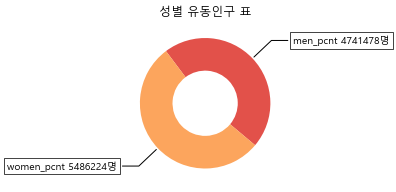

In [94]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(gender, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(gender_values[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("성별 유동인구 표")

plt.show()

In [100]:
# 나이대
ages = road_popul.loc[:,['teen_pcnt','twenty_pcnt','thirty_pcnt','fourty_pcnt','fifty_pcnt','sixty_pcnt']]
ages_columns = ["10대","20대","30대","40대","50대","60대 이상",]
ages_values = []
index = 0
for i in ages:
    str = ages_columns[index]
    str += " " + np.array2string(ages[i].values[0])
    str += "명"
    ages_values.append(str)
    index += 1
    
ages_values

['10대 490893명',
 '20대 3549342명',
 '30대 2627125명',
 '40대 1566155명',
 '50대 1075120명',
 '60대 이상 919085명']

c:\users\multicampus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


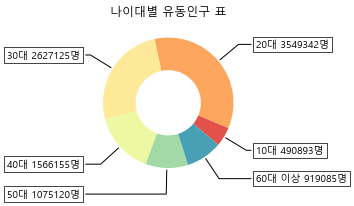

In [101]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(ages, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(ages_values[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("나이대별 유동인구 표")

plt.show()

In [103]:
# 시간대
times = road_popul.loc[:,['time1_pcnt','time2_pcnt','time3_pcnt','time4_pcnt','time5_pcnt','time6_pcnt']]
times_columns = ["00시~06시", "06시~11시", "11시~14시", "14시~17시", "17시~21시", "21시~24시"]
times_values = []
index = 0
for i in times:
    str = times_columns[index]
    str += " " + np.array2string(times[i].values[0])
    str += "명"
    times_values.append(str)
    index += 1
times_values

['00시~06시 1060583명',
 '06시~11시 1347133명',
 '11시~14시 1855281명',
 '14시~17시 2013798명',
 '17시~21시 2732359명',
 '21시~24시 1218547명']

c:\users\multicampus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


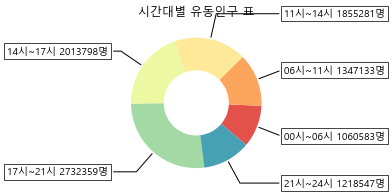

In [104]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(times, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(times_values[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("시간대별 유동인구 표")

plt.show()

In [106]:
# 요일별
days = road_popul.loc[:,['mon_pcnt','tue_pcnt','wed_pcnt','thr_pcnt','fri_pcnt','sat_pcnt','sun_pcnt']]
days_columns=["월","화","수","목","금","토","일"]
days_values = []
index = 0
for i in days:
    str = days_columns[index]
    index += 1
    str += " " + np.array2string(days[i].values[0])
    str += "명"
    days_values.append(str)
    
days_values

['월 1405208명',
 '화 1464865명',
 '수 1478716명',
 '목 1475341명',
 '금 1589906명',
 '토 1557025명',
 '일 1256646명']

c:\users\multicampus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


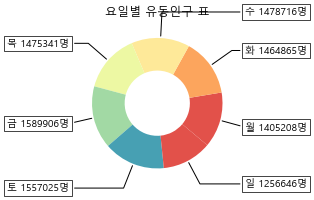

In [107]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(days, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(days_values[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("요일별 유동인구 표")

plt.show()